In [2]:
import pandas as pd

# 시리즈 클래스 
시리즈 = 값(value) + 인덱스(index)

# 시리즈 생성

In [4]:
s = pd.Series([9904312, 3448737, 2890451, 2466052],
              index=["서울", "부산", "인천", "대구"])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [5]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [6]:
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [7]:
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

# 시리즈 연산

In [9]:
s / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

# 시리즈 인덱싱

In [11]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [12]:
s[1]

3448737

In [13]:
s[-1]

2466052

In [14]:
s["부산"]

3448737

In [15]:
s["대구"]

2466052

In [16]:
s[ [0, 3, 1] ]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [17]:
s[["서울", "대구", "부산"]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [18]:
s[ (250e4 < s) & (s < 500e4) ]  # 인구가 250만 초과, 500만 미만인 경우 # e4 0 4개 생략

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

# 슬라이싱을 해도 부분적인 시리즈를 반환한다.
이 때 문자열 라벨을 이용한 슬라이싱을 하는 경우에는 숫자 인덱싱과 달리 콜론(:) 기호 뒤에 오는 값도 결과에 포함되므로 주의해야 한다.

In [20]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [21]:
s[1:3]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [22]:
s["부산":"대구"]  # 부산에서 대구까지 (대구도 포함)

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [ ]:
# 만약 라벨 값이 문자열인 경우에는 인덱스 라벨이 속성인것처럼 점(.)을 이용하여 해당 인덱스 값에 접근 가능

In [23]:
s0 = pd.Series(range(3), index=["a", "b", "c"])
s0

a    0
b    1
c    2
dtype: int64

In [24]:
s0.a

0

In [25]:
s.부산

3448737

# 시리즈와 딕셔너리 자료형 
셔너리 자료형에서 제공하는 in 연산도 가능하고 items 메서드를 사용하면 for 루프를 통해 각 원소의 키(key)와 값(value)을 접근 가능

In [32]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [35]:
"서울" in s  # 인덱스 라벨 중에 서울이 포함되어 있는지

True

In [34]:
"대전" in s  # 인덱스 라벨 중에 대전이 있는가

False

In [36]:
for k, v in s.items():
    print("%s = %d" % (k, v))

서울 = 9904312
부산 = 3448737
인천 = 2890451
대구 = 2466052


In [37]:
# 딕셔너리의 원소는 순서를 가지지 않으므로 시리즈의 데이터도 순서가 보장되지 않는다.

In [38]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158},
               index=["부산", "서울", "인천", "대전"])
s2

부산    3393191
서울    9631482
인천    2632035
대전    1490158
dtype: int64

In [39]:
# 인덱스 기반 연산

In [40]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [41]:
s2

부산    3393191
서울    9631482
인천    2632035
대전    1490158
dtype: int64

In [42]:
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [43]:
s.values - s2.values

array([ 6511121, -6182745,   258416,   975894], dtype=int64)

In [44]:
# 자료가 모두 존재하지 않기 때문에 계산이 불가능하므로 NaN(Not a Number)이라는 값을 가지게 됨
# NaN 값이 float 자료형에서만 가능, 다른 계산 결과도 모두 float 자료형이 되었다는 점에 주의
# NaN이 아닌 값을 구하려면 notnull 메서드를 사용

In [45]:
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

In [46]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [47]:
# 인구 증가율(%)

In [48]:
# s : 2015,  s2 : 2010
rs = ( (s - s2)/s2 ) * 100
rs

대구         NaN
대전         NaN
부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

In [49]:
rs = rs[rs.notnull()]
rs

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

# 데이터의 갱신, 추가, 삭제

In [50]:
rs["부산"] = 1.63
rs

부산    1.630000
서울    2.832690
인천    9.818107
dtype: float64

In [51]:
rs["대구"] = 1.41
rs

부산    1.630000
서울    2.832690
인천    9.818107
대구    1.410000
dtype: float64

In [52]:
del rs["서울"]
rs

부산    1.630000
인천    9.818107
대구    1.410000
dtype: float64

# 데이터프레임 클래스(중요) 
2차원이므로, 행 인덱스, 열인덱스 이름 붙일 수 있음

# 데이터프레임 생성 
데이터프레임은 각 열(column)마다 자료형이 다를 수 있음

In [54]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"] # 순서 지정
index = ["서울", "부산", "인천", "대구"] # 순서 지정
df = pd.DataFrame(data, index=index, columns=columns) # 클래스 대문자
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [55]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [56]:
df.columns # 자주 사용

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [57]:
df.index # 자주 사용

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [58]:
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [60]:
df.T # 전치(transpose) 자주 사용

도시,서울,부산,인천,대구
특성,,,,
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


# 열 데이터의 갱신, 추가, 삭제

In [62]:
 df["2010-2015 증가율"] * 100

도시
서울    2.83
부산    1.63
인천    9.82
대구    1.41
Name: 2010-2015 증가율, dtype: float64

In [63]:
# "2010-2015 증가율"이라는 이름의 열 추가
df["2010-2015 증가율"] = df["2010-2015 증가율"] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [64]:
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [65]:
# "2010-2015 증가율"이라는 이름의 열 삭제
del df["2010-2015 증가율"]
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


# 열 인덱싱

In [66]:
# 하나의 열만 인덱싱하면 시리즈가 반환된다.
df["지역"]

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [67]:
df["2010", "2015"] # 인덱싱 해주는 용도, 리스트 하려면 괄호 한번 더

KeyError: ('2010', '2015')

In [68]:
df[ ["2010", "2015"] ]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


In [69]:
# 하나의 열만 빼내면서 데이터프레임 자료형을 유지하고 싶다면 원소가 하나인 리스트를 써서 인덱싱

In [70]:
df[ "2010" ], type(df["2010"])

(도시
 서울    9631482
 부산    3393191
 인천    2632035
 대구    2431774
 Name: 2010, dtype: int64,
 pandas.core.series.Series)

In [71]:
df[ ["2010"] ]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [72]:
# 데이터프레임의 열 인덱스가 문자열 라벨을 가지고 있는 경우에는 순서를 나타내는 정수 인덱스를 열 인덱싱에 사용할 수 없다. 
# 다만 원래부터 문자열이 아닌 정수형 열 인덱스를 가지는 경우에는 인덱스 값으로 정수를 사용할 수 있다.

In [78]:
import numpy as np

In [79]:
df2 = pd.DataFrame(np.arange(12).reshape(3, 4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [80]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int32

In [81]:
df2[[1, 2]]

,1,2
0,1,2
1,5,6
2,9,10


# 행 인덱싱

In [82]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [83]:
df[:1]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [84]:
df[1:2]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


In [85]:
df[1:3]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54


In [86]:
df["서울":"부산"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40


In [87]:
# 개별 데이터 인덱싱

In [88]:
df["2015"]["서울"]

9904312

# 연습문제 
다음 데이터프레임에서 지정하는 데이터를 뽑아내거나 처리하라.

data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)
(1) 모든 학생의 수학 점수를 시리즈로 나타낸다.

(2) 모든 학생의 국어와 영어 점수를 데이터 프레임으로 나타낸다.

(3) 모든 학생의 각 과목 평균 점수를 새로운 열로 추가한다.

(4) 방자의 영어 점수를 80점으로 수정하고 평균 점수도 다시 계산한다.

(5) 춘향의 점수를 데이터프레임으로 나타낸다.

(6) 향단의 점수를 시리즈로 나타낸다.

In [91]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

In [92]:
df['수학']

춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

In [94]:
df[['국어','영어']]

,국어,영어
춘향,80,90
몽룡,90,70
향단,70,60
방자,30,40


In [95]:
df['평균점수']=round(df.mean(axis=1),2)

In [96]:
df

,국어,영어,수학,평균점수
춘향,80,90,90,86.67
몽룡,90,70,60,73.33
향단,70,60,80,70.00
방자,30,40,70,46.67


In [98]:
df['영어']['방자'] = 80 # 컬럼명부터
df["평균 점수"] = round(df.mean(axis=1),2)
df

C:\Users\lg\AppData\Local\Temp\ipykernel_2532\622636949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['영어']['방자'] = 80 # 컬럼명부터


,국어,영어,수학,평균점수,평균 점수
춘향,80,90,90,86.67,86.67
몽룡,90,70,60,73.33,73.33
향단,70,60,80,70.00,70.00
방자,30,80,70,46.67,56.67


In [99]:
df[:1]

,국어,영어,수학,평균점수,평균 점수
춘향,80,90,90,86.67,86.67


In [100]:
df.T['향단']

국어       70.0
영어       60.0
수학       80.0
평균점수     70.0
평균 점수    70.0
Name: 향단, dtype: float64

# 데이터 입출력

In [1]:
%%writefile sample1.csv
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing sample1.csv


# CSV 파일 입력

In [10]:
import pandas as pd

In [8]:
pd.read_csv('sample1.csv') # 열 인덱스는 있지만 행 인덱스 정보가 없음/ 정수 인덱스가 자동으로 추가

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [12]:
%%writefile sample2.csv
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing sample2.csv


In [13]:
pd.read_csv('sample2.csv', names=['c1', 'c2', 'c3']) # 열 인덱스 정보가 없는 경우에는 read_csv 명령의 names 인수로 설정

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [6]:
pd.read_csv('sample1.csv', index_col='c1') # 열을 행 인덱스로 지정하고 싶으면 index_col 인수를 사용

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


In [14]:
%%writefile sample3.txt
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Writing sample3.txt


In [15]:
pd.read_table('sample3.txt', sep='\s+') # 데이터를 구분하는 구분자(separator)가 쉼표(comma)가 아니면 sep 인수를 써서 구분자를 사용자가 지정

,c1,c2,c3,c4
0,0.179181,-1.538472,1.347553,0.43381
1,1.024209,0.087307,-1.281997,0.49265
2,0.417899,-2.002308,0.255245,-1.10515


In [16]:
%%writefile sample4.txt
파일 제목: sample4.txt
데이터 포맷의 설명:
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing sample4.txt


In [17]:
pd.read_csv('sample4.txt', skiprows=[0, 1]) # 건너 뛰어야 할 행이 있으면 skiprows 인수를 사용

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [18]:
%%writefile sample5.csv
c1, c2, c3
1, 1.11, one
2, , two
누락, 3.33, three

Writing sample5.csv


In [19]:
df = pd.read_csv('sample5.csv', na_values=['누락']) # 특정한 값을 NaN으로 취급하고 싶으면 na_values 인수에 NaN 값으로 취급할 값 넣기
df 

,c1,c2,c3
0,1.0,1.11,one
1,2.0,,two
2,NaN,3.33,three


# CSV 파일 출력

In [21]:
df.to_csv('sample6.csv') # 데이터프레임 값을 CSV 파일로 출력

In [22]:
!type sample6.csv # , NaN

,c1, c2, c3
0,1.0, 1.11, one
1,2.0, , two
2,, 3.33, three


In [23]:
df.to_csv('sample7.txt', sep='|') # 구분자 변경

In [24]:
!type sample7.txt

|c1| c2| c3
0|1.0| 1.11| one
1|2.0| | two
2|| 3.33| three


In [25]:
df

,c1,c2,c3
0,1.0,1.11,one
1,2.0,,two
2,NaN,3.33,three


In [27]:
df.to_csv('sample8.csv', na_rep='누락') # unicode encoding 처리 필요 
# na_rep 인수로 NaN 표시값 변경 가능

In [28]:
!type sample8.csv

,c1, c2, c3
0,1.0, 1.11, one
1,2.0, , two
2,�늻�씫, 3.33, three


In [29]:
df.index = ["a", "b", "c"] #인덱스 및 헤더 출력 여부를 지정
df

,c1,c2,c3
a,1.0,1.11,one
b,2.0,,two
c,NaN,3.33,three


In [32]:
df.to_csv('sample9.csv', index=False, header=False) 

In [31]:
!type sample9.csv

1.0, 1.11, one
2.0, , two
, 3.33, three


# 인터넷 상의 CSV 파일 입력 
파일 path 대신 URL을 지정하면 Pandas가 직접 해당 파일을 다운로드하여 읽어

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
df.head() # 앞이나 뒤의 특정 갯수만 보고 싶다면 head 메서드나 tail 메서드를 이용 #앞

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.tail(10) # 뒤

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# 인터넷 상의 데이터 베이스 자료 입력(참고) 
pandas_datareader 패키지의 DataReader 을 사용하면 일부 인터넷 사이트의 자료를 바로 pandas로 읽을 수 있음

In [37]:
import datetime
dt_start = datetime.datetime(2015, 1, 1)
dt_end = "2016, 6, 30"

In [39]:
pip install pandas_datareader


     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     ------------------------------------- -- 102.4/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 1.6 MB/s eta 0:00:00


In [40]:
import pandas_datareader as pdr

In [42]:
gdp = pdr.get_data_fred('GDP', dt_start, dt_end)
gdp.tail()

,GDP
DATE,
2015-04-01,18279.784
2015-07-01,18401.626
2015-10-01,18435.137
2016-01-01,18525.933
2016-04-01,18711.702


In [43]:
inflation = pdr.get_data_fred(["CPIAUCSL", "CPILFESL"], dt_start, dt_end) # 물가지수
inflation.tail()

,CPIAUCSL,CPILFESL
DATE,,
2016-02-01,237.336,245.510
2016-03-01,238.080,245.913
2016-04-01,238.992,246.551
2016-05-01,239.557,247.137
2016-06-01,240.222,247.540


# 데이터프레임 고급 인덱싱(아주 중요) 
- loc : 라벨값 기반의 2차원 인덱싱 # 사람관점의 라벨인덱스 기준
 
- iloc : 순서를 나타내는 정수 기반의 2차원 인덱싱 # 컴퓨터관점의 인덱스 기준

# loc 인덱서 
- df.loc[행 인덱싱값] 
- df.loc[행 인덱싱값, 열 인덱싱값]

In [46]:
import pandas as pd

In [48]:
import numpy as np

In [49]:
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4),
                  index=["a", "b", "c"],
                  columns=["A", "B", "C", "D"])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [50]:
df['A']

a    10
b    14
c    18
Name: A, dtype: int32

In [51]:
df.loc["a"] # 행 정보 조회

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [53]:
df["b":"c"] # 슬라이싱으로 행 인덱스 사용 가능

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [52]:
df.loc["b":"c"] # 행 인덱스 사용 # 범위로 추출

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [54]:
df.loc[ ["b", "c"] ] # 특정 정보 추출

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [56]:
df[["b", "c"]] # KeyError # 컬럼이 존재하지 않아 에러 발생

KeyError: "None of [Index(['b', 'c'], dtype='object')] are in the [columns]"

In [57]:
df.A > 15

a    False
b    False
c     True
Name: A, dtype: bool

In [58]:
df.loc[df.A > 15] # 불린 시리즈 사용 가능

,A,B,C,D
c,18,19,20,21


In [59]:
def select_rows(df):
    return df.A > 15

In [60]:
select_rows(df)

a    False
b    False
c     True
Name: A, dtype: bool

In [61]:
df.loc[select_rows(df)]

,A,B,C,D
c,18,19,20,21


In [62]:
df['A'] # 칼럼이 기준

a    10
b    14
c    18
Name: A, dtype: int32

In [63]:
df.loc["A"]  # KeyError # loc 기준은 행  
# loc 인덱서가 없는 경우에 사용했던 라벨(칼럼) 인덱싱이나 라벨 리스트 인덱싱은 불가능

KeyError: 'A'

In [64]:
df[["A", "B"]] 

,A,B
a,10,11
b,14,15
c,18,19


In [65]:
df2 = pd.DataFrame(np.arange(10, 26).reshape(4, 4), columns=["A", "B", "C", "D"]) #슬라이싱도 라벨 슬라이싱 방식
df2

,A,B,C,D
0,10,11,12,13
1,14,15,16,17
2,18,19,20,21
3,22,23,24,25


In [67]:
df2.loc[1:2] # 슬라이스의 마지막 값이 포함

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


# 인덱싱값을 행과 열 모두 받는 경우 
df.loc[행 인덱스, 열 인덱스]

In [69]:
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [70]:
df.loc["a", "A"]

10

In [71]:
df.loc["b": , "A"] # b이후 전부, A열 # 시리즈로 반환

b    14
c    18
Name: A, dtype: int32

In [72]:
df.loc["a", :] # 시리즈로 반환

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [73]:
df.loc[["a", "b"], ["B", "D"]]

,B,D
a,11,13
b,15,17


In [74]:
df.loc[df.A > 10, ["C", "D"]]

,C,D
b,16,17
c,20,21


# iloc 인덱서 
라벨이 아니라 순서를 나타내는 정수(integer) 인덱스

In [75]:
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [76]:
df.iloc[0, 1] # 직관적임/ 행과 열이 많은 경우에는 행,열명을 특정해 주는 것이 편함

11

In [77]:
df.iloc[:2, 2]

a    12
b    16
Name: C, dtype: int32

In [78]:
df.iloc[0, -2:]

C    12
D    13
Name: a, dtype: int32

In [79]:
df.iloc[2:3, 1:3]

,B,C
c,19,20


In [92]:
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,576,608,640,672


In [93]:
df.iloc[-1] # 인덱스가 하나만 들어가면 행을 선택

A    576
B    608
C    640
D    672
Name: c, dtype: int32

In [94]:
df.iloc[-1] = df.iloc[-1] * 2
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,1152,1216,1280,1344


In [99]:
# 데이터프레임의 데이터 조작

In [100]:
# 데이터 갯수 세기

In [101]:
import pandas as pd
import numpy as np

In [102]:
s = pd.Series(range(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [103]:
s[3] = np.nan
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [104]:
s.count() # 각 열마다 별도로 데이터 갯수를 셈 # 값이 누락된 부분을 찾을 때 유용

9

In [105]:
np.random.seed(2)
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df.iloc[2, 3] = np.nan
df

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [14]:
import seaborn as sns

In [16]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [109]:
# 카테고리 값 세기

In [110]:
import pandas as pd
np.random.seed(1) # seed :난수를 만들 때 기준이 되는 값
s2 = pd.Series(np.random.randint(6, size=100))
s2.tail()

95    4
96    5
97    2
98    4
99    3
dtype: int32

In [111]:
s2.value_counts() # 해당 값이 등장한 횟수 #시리즈에서만 사용 가능

1    22
0    18
4    17
5    16
3    14
2    13
Name: count, dtype: int64

In [112]:
df

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [113]:
df[0].value_counts() # 데이터프레임에는 value_counts 메서드가 없으므로 각 열마다 별도로 적용

0
3.0    2
0.0    1
4.0    1
Name: count, dtype: int64

In [116]:
np.random.seed(1) 

In [115]:
np.random.randint(1)

0

# 정렬 
sort_index 메서드는 인덱스 값을 기준으로,  
sort_values 메서드는 데이터 값을 기준으로 정렬

In [118]:
s2.value_counts().sort_index() 

0    18
1    22
2    13
3    14
4    17
5    16
Name: count, dtype: int64

In [119]:
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [120]:
s.sort_values() # 정렬하면 NaN값이 가장 나중

0    0.0
1    1.0
2    2.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
3    NaN
dtype: float64

In [121]:
s.sort_values(ascending=False) # 반대 방향 정렬

9    9.0
8    8.0
7    7.0
6    6.0
5    5.0
4    4.0
2    2.0
1    1.0
0    0.0
3    NaN
dtype: float64

In [122]:
df.sort_values(by=1) # 해당 열을 기준으로 정렬 # 동일한 값이 있을 경우 다음 순서로 옴

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [124]:
df.sort_values(by=2)

,0,1,2,3
1,3.0,0.0,2.0,1.0
0,0.0,0.0,3.0,2.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [123]:
df.sort_values(by=[1, 2])

,0,1,2,3
1,3.0,0.0,2.0,1.0
0,0.0,0.0,3.0,2.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


# 연습 문제 
sort_values 메서드를 사용하여 타이타닉호 승객에 대해 성별(sex) 인원수, 나이별(age) 인원수, 선실별(class) 인원수, 사망/생존(alive) 인원수를 구하라. ``

In [126]:
titanic[['sex', 'age', 'class', 'alive']]

,sex,age,class,alive
0,male,22.0,Third,no
1,female,38.0,First,yes
2,female,26.0,Third,yes
3,female,35.0,First,yes
4,male,35.0,Third,no
...,...,...,...,...
886,male,27.0,Second,no
887,female,19.0,First,yes
888,female,NaN,Third,no
889,male,26.0,First,yes


In [127]:
titanic['sex'].sort_values()

383    female
218    female
609    female
216    female
215    female
        ...  
371      male
372      male
373      male
360      male
890      male
Name: sex, Length: 891, dtype: object

In [128]:
titanic['sex'].sort_values().value_counts() # 범주별 카운트

sex
male      577
female    314
Name: count, dtype: int64

In [140]:
list1 = ['sex', 'age', 'class', 'alive']
for l in list1:
    print(titanic[l].value_counts())
    print('='*10)

sex
male      577
female    314
Name: count, dtype: int64
age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
class
Third     491
First     216
Second    184
Name: count, dtype: int64
alive
no     549
yes    342
Name: count, dtype: int64


# 행/열 합계

# 행과 열의 합계를 구할 때는 sum(axis) 메서드 

In [137]:
np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


# 열방향 합계를 구할 때는 sum(axis=1) 메서드 
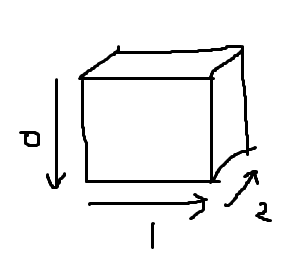

In [138]:
df2.sum(axis=1)

0    35
1    34
2    41
3    42
dtype: int64

In [139]:
df2["RowSum"] = df2.sum(axis=1)
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42


In [141]:
df2.sum(axis=1) # 열방향 행합계

0    70
1    68
2    82
3    84
dtype: int64

In [142]:
df2["RowSum"] = df2.sum(axis=1)
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,70
1,6,9,2,4,5,2,4,2,68
2,4,7,7,9,1,7,0,6,82
3,9,9,7,6,9,1,0,1,84


# 행 방향 합계를 구할 때는 sum(axis=0) 메서드 
axis인수 생략 가능 
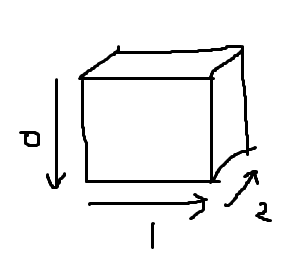

In [143]:
df2.sum()

0          24
1          33
2          25
3          24
4          15
5          10
6           5
7          16
RowSum    304
dtype: int64

In [144]:
df2.loc["ColTotal", :] = df2.sum()
df2

,0,1,2,3,4,5,6,7,RowSum
0,5.0,8.0,9.0,5.0,0.0,0.0,1.0,7.0,70.0
1,6.0,9.0,2.0,4.0,5.0,2.0,4.0,2.0,68.0
2,4.0,7.0,7.0,9.0,1.0,7.0,0.0,6.0,82.0
3,9.0,9.0,7.0,6.0,9.0,1.0,0.0,1.0,84.0
ColTotal,24.0,33.0,25.0,24.0,15.0,10.0,5.0,16.0,304.0


In [145]:
df.mean()

0    2.500000
1    1.250000
2    3.250000
3    1.666667
dtype: float64

In [146]:
df.mean(axis=1)

0    1.25
1    1.50
2    3.00
3    3.25
dtype: float64

# 연습문제  
 
1.타이타닉호 승객의 평균 나이를 구하라.
 
2.타이타닉호 승객중 여성 승객의 평균 나이를 구하라.
 
3.타이타닉호 승객중 1등실 선실의 여성 승객의 평균 나이를 구하라.

In [67]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male22
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female38
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female26
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female35
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male35


In [149]:
# 1.타이타닉호 승객의 평균 나이를 구하라
titanic['age'].mean()

29.69911764705882

In [162]:
# 2.타이타닉호 승객중 여성 승객의/ 평균 나이를 구하라. 
titanic[titanic['sex']=='female']['age'].mean()

27.915708812260537

In [163]:
# 3.타이타닉호 승객중 1등실 선실의// 여성 승객의// 평균 나이를 구하라.
titanic[(titanic['class']=='First') & (titanic['sex']=='female')]['age'].mean()

34.61176470588235

# apply 변환(중요) 
데이터 가공시 데이터를 하나씩 추출하여 다시 넣을 경우 사용

In [6]:
df3 = pd.DataFrame({
    'A': [1, 3, 4, 3, 4],
    'B': [2, 3, 1, 2, 3],
    'C': [1, 5, 2, 4, 4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [166]:
df3.apply(lambda x: x.max() - x.min()) # default axis=0,

A    3
B    2
C    4
dtype: int64

In [167]:
df3.apply(lambda x: x.max() - x.min(), axis=1) 

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [168]:
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [169]:
df3.apply(pd.value_counts)

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


# 연습문제 
다음과 같이 타이타닉호의 승객 중 나이 20살을 기준으로 성인(adult)과 미성년자(child)를 구별하는 라벨 열

In [173]:
titanic["adult/child"] = titanic.apply(lambda p: "adult" if p.age >= 20 else "child", axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult


# 연습문제 
타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category1 열을 만들어라.
category1 카테고리는 다음과 같이 정의된다.

 
1.20살이 넘으면 성별을 그대로 사용한다.
 
2.20살 미만이면 성별에 관계없이 "child"라고 한다.

In [178]:
titanic["category1"] = titanic.apply(lambda p: p.sex if p.age >= 20 else "child", axis=1) 
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult,male


# fillna 메서드 
NaN 값은 fillna 메서드를 사용하여 원하는 값으로 바꿀 수 있음

In [7]:
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [8]:
df3['A']

0    1
1    3
2    4
3    3
4    4
Name: A, dtype: int64

In [9]:
df3['A'].value_counts()

A
3    2
4    2
1    1
Name: count, dtype: int64

In [10]:
df3.apply(pd.value_counts) # axis=0 열기준

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [11]:
df3.apply(pd.value_counts).fillna(0.0)

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


# 연습 문제  
타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이 값이 되도록 titanic 데이터프레임을 고쳐라. (결측값 해결) 
 
------ 결측값 처리 ------
- 결측값은 함부로 삭제하면 안됨.  
- 결측값 자체도 정보를 포함하고 있기 때문.  
- 결측치도 이상치임으로 중요할 수 있음 
----------------------------
도메인에 따라 다르지만 10% 넘어가면 칼럼을 아예 삭제하기도 함 ---> 도메인 전문성이 필요 
 
결측값 대체시 평균, 중앙값, 최빈값, 라운드로빈 등으로 대체함. ---> 도메인의 특성 고려해야함

In [22]:
titanic['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [21]:
titanic['age'].sort_values()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: age, Length: 891, dtype: float64

In [17]:
titanic['age'].isnull() # 불린 인덱싱

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [23]:
titanic['age'].isnull().sum()

177

In [24]:
titanic[titanic['age'].isnull()]['age'] # True가 Nan값

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: age, Length: 177, dtype: float64

In [18]:
round(titanic['age'].mean())

30

In [19]:
titanic['age'].fillna(round(titanic['age'].mean()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [26]:
titanic['age']=titanic['age'].fillna(round(titanic['age'].mean())) 
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,30.0,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [29]:
titanic['age'].fillna( round(titanic['age'].mean()), inplace=True) # 원본에 적용 
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,30.0,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# astype 메서드 
astype 메서드로 전체 데이터의 자료형을 바꾸기

In [30]:
df3.apply(pd.value_counts).fillna(0) # 가장 큰 속성(배열)이 유지

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [31]:
df3.apply(pd.value_counts).fillna(0).astype(int)

,A,B,C
1,1,1,1
2,0,2,1
3,2,2,0
4,2,0,2
5,0,0,1


# 연습 문제 
타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category2 열을 만들어라.
 
category2 카테고리는 다음과 같이 정의된다.

 
1.성별을 나타내는 문자열 male 또는 female로 시작한다.
 
2.성별을 나타내는 문자열 뒤에 나이를 나타내는 문자열이 온다.
 
3.예를 들어 27살 남성은 male27 값이 된다.

In [38]:
titanic['category2'] = titanic['sex'] + titanic['age'].astype(str)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female19.0
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female30.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male26.0


In [40]:
titanic['category2'] = titanic.sex + titanic.age.astype(str) # 교안 답안
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female19.0
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female30.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male26.0


In [66]:
titanic["category2"] = titanic.apply(lambda x: x.sex + str(int(x.age)), axis=1) # int로 먼저 바꾸고 str
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male22
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female38
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female26
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female35
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male27
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female19
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female30
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male26


# 실수 값을 카테고리 값으로 변환(범주형 데이터로 변환) 
- cut: 실수 값의 경계선을 지정하는 경우

- qcut: 갯수가 똑같은 구간으로 나누는 경우

In [45]:
pd.cut?

In [42]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]

In [44]:
bins = [1, 20, 40, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"] # 카테고리 범주는 순서를 가짐
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '장년', '미성년자', '중년', '청년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [75]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [47]:
cats.categories # 카테고리에 대한 정보를 알 수 있음

Index(['미성년자', '청년', '중년', '장년', '노년'], dtype='object')

In [48]:
cats.codes # 해당하지 않을 경우 음수

array([-1,  0,  0,  1,  1,  1,  1,  3,  0,  2,  1, -1], dtype=int8)

In [49]:
df4 = pd.DataFrame(ages, columns=["ages"])
df4

,ages
0,0
1,2
2,10
3,21
4,23
5,37
6,31
7,61
8,20
9,41


In [50]:
df4["age_cat"] = pd.cut(df4.ages, bins, labels=labels)
print(bins)
print(labels)
df4

[1, 20, 40, 50, 70, 100]
['미성년자', '청년', '중년', '장년', '노년']


,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,청년
6,31,청년
7,61,장년
8,20,미성년자
9,41,중년


In [51]:
df4['age_cat'] # apply 대신 편하게 카테고리화 할 수 있음

0      NaN
1     미성년자
2     미성년자
3       청년
4       청년
5       청년
6       청년
7       장년
8     미성년자
9       중년
10      청년
11     NaN
Name: age_cat, dtype: category
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [52]:
df4.age_cat.astype(str) + df4.ages.astype(str) # 데이터 타입(스트링) 변환

0       nan0
1      미성년자2
2     미성년자10
3       청년21
4       청년23
5       청년37
6       청년31
7       장년61
8     미성년자20
9       중년41
10      청년32
11    nan101
dtype: object

In [54]:
import numpy as np

In [55]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4, labels=["Q1", "Q2", "Q3", "Q4"]) # 데이터 갯수가 같게 구간으로 나눔
cats

['Q1', 'Q3', 'Q1', 'Q2', 'Q3', ..., 'Q1', 'Q3', 'Q4', 'Q4', 'Q3']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [56]:
pd.value_counts(cats)

Q1    250
Q2    250
Q3    250
Q4    250
Name: count, dtype: int64

# 연습 문제 
1.타이타닉호 승객을 '미성년자', '청년', '중년', '장년', '노년' 나이 그룹으로 나눈다. 
 
 2.각 나이 그룹의 승객 비율을 구한다. 비율의 전체 합은 1

In [78]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

df5 = pd.cut(titanic.age, bins, labels=labels)
df5.head()

0    청년
1    중년
2    청년
3    중년
4    중년
Name: age, dtype: category
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [79]:
df5.value_counts() # 각각 value에 대한 갯수

age
청년      407
중년      241
미성년자    165
장년       59
노년        5
Name: count, dtype: int64

In [80]:
df5.value_counts()/ len(df5) * 100

age
청년      45.679012
중년      27.048260
미성년자    18.518519
장년       6.621773
노년       0.561167
Name: count, dtype: float64

# 연습문제 
타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category3 열을 만들어라. category3 카테고리는 다음과 같이 정의된다.

 
1. 20살 미만이면 성별에 관계없이 "미성년자"라고 한다.
 
2. 20살 이상이면 나이에 따라 "청년", "중년", "장년", "노년"을 구분하고 그 뒤에 성별을 나타내는 "남성", "여성"을 붙인다.


In [81]:
bins = [1, 20, 40, 50, 70, 100] 
labels = ["미성년자", "청년", "중년", "장년", "노년"]
sex = ['남성', '여성']

In [82]:
titanic["category3"] = pd.cut(titanic.age, bins, labels=labels)
titanic["category3"] 

0        청년
1        청년
2        청년
3        청년
4        청년
       ... 
886      청년
887    미성년자
888      청년
889      청년
890      청년
Name: category3, Length: 891, dtype: category
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [83]:
titanic["category3"] = titanic.apply(lambda x : '미성년자' if x.age <= 20 else x.category3 + x.sex, axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category2,category3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male22,청년male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female38,청년female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female26,청년female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female35,청년female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male35,청년male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male27,청년male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female19,미성년자
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female30,청년female
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male26,청년male


In [84]:
titanic["category3"] = pd.cut(titanic.age, bins, labels=labels)
titanic["category3"] = titanic.apply(lambda x : '미성년자' if x.age <= 20 else 
                                     (x.category3 + '남성' if x.sex == 'male' else x.category3 + '여성'), axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category2,category3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male22,청년남성
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female38,청년여성
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female26,청년여성
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female35,청년여성
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male35,청년남성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male27,청년남성
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female19,미성년자
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female30,청년여성
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male26,청년남성


# 데이터프레임 인덱스 조작

# 데이터프레임 인덱스 설정 및 제거 
- set_index : 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 설정
- reset_index : 기존의 행 인덱스를 제거하고 인덱스를 데이터 열로 추가

In [88]:
import pandas as pd

In [89]:
np.round(np.random.rand(3, 5), 2)

array([[0.95, 0.62, 0.89, 0.06, 0.41],
       [0.09, 0.82, 0.4 , 0.49, 0.12],
       [0.66, 0.17, 0.28, 0.04, 0.57]])

In [90]:
np.vstack([list('ABCDE'), np.round(np.random.rand(3, 5), 2)])

array([['A', 'B', 'C', 'D', 'E'],
       ['0.75', '0.86', '0.28', '0.37', '0.2'],
       ['0.37', '0.93', '0.23', '0.47', '0.46'],
       ['0.48', '0.85', '0.62', '0.11', '0.22']], dtype='<U32')

In [92]:
np.random.seed(0)
df1 = pd.DataFrame(np.vstack([list('ABCDE'), np.round(np.random.rand(3, 5), 2)]).T, # 행 인덱스
                   columns=["C1", "C2", "C3", "C4"]) # 열 인덱스
df1

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [93]:
df2 = df1.set_index("C1") # set_index 메서드로 특정한 열을 인덱스로 설정
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [95]:
df2.set_index("C2")

,C3,C4
C2,,
0.55,0.65,0.79
0.72,0.44,0.53
0.6,0.89,0.57
0.54,0.96,0.93
0.42,0.38,0.07


In [96]:
df2 # 원본 반영은 제일 마지막으로

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [97]:
df2.reset_index() #reset_index 메서드를 쓰면 인덱스를 보통의 자료열로 바꿀 수 있음

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [98]:
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [100]:
df2.reset_index(drop=True) #인덱스 열 버림

,C2,C3,C4
0,0.55,0.65,0.79
1,0.72,0.44,0.53
2,0.6,0.89,0.57
3,0.54,0.96,0.93
4,0.42,0.38,0.07


# 연습문제

5명의 학생의 국어, 영어, 수학 점수를 나타내는 데이터프레임을 다음과 같이 만든다. # 5행 3열

1. 학생 이름을 나타내는 열을 포함시키지 않고 데이터프레임 df_score1 을 생성한 후,
df_score1.index 속성에 학생 이름을 나타내는 열을 지정하여 인덱스를 지정한다.
reset_index 명령으로 이 인덱스 열을 명령으로 일반 데이터열로 바꾸여 데이터프레임 df_score2을 만든다.
 
2. 학생 이름을 나타내는 열이 일반 데이터 열을 포함하는 데이터프레임 df_score2에 set_index 명령을 적용하여 다시 학생 이름을 나타내는 열을 인덱스로 변경한다. ````

In [6]:
import pandas as pd 
import numpy as np

In [7]:
df_score1 = pd.DataFrame(np.random.randint(0, 101, size=(5, 3)), columns=['국어', '영어', '수학'])
df_score1

,국어,영어,수학
0,50,3,49
1,87,37,31
2,68,71,70
3,55,56,59
4,22,95,61


In [8]:
df_score1.index = ['학생1', '학생2', '학생3', '학생4', '학생5']
df_score1

,국어,영어,수학
학생1,50,3,49
학생2,87,37,31
학생3,68,71,70
학생4,55,56,59
학생5,22,95,61


In [9]:
df_score2 = df_score1.reset_index()
df_score2

,index,국어,영어,수학
0,학생1,50,3,49
1,학생2,87,37,31
2,학생3,68,71,70
3,학생4,55,56,59
4,학생5,22,95,61


In [10]:
df_score2 = df_score2.set_index('index')
df_score2

,국어,영어,수학
index,,,
학생1,50,3,49
학생2,87,37,31
학생3,68,71,70
학생4,55,56,59
학생5,22,95,61


# 다중 인덱스

In [12]:
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C1", "C2", "C1", "C2"]])
df3

A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

In [13]:
df3.columns.names = ["Cidx1", "Cidx2"]
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [14]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C", "D", "C", "D"]],
                   index=[["M", "M", "M", "F", "F", "F"],
                          ["id_" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"] # 행 인덱스 이름
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [15]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C", "D", "C", "D"]],
                   index=[["M", "M", "M", "F", "F", "F"],
                          ["id_1","id_2","id_3"] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"] # 행 인덱스 이름
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

# 행 인덱스와 열 인덱스 교환 
- stack 열 인덱스 -> 행 인덱스로 변환
 
- unstack 행 인덱스 -> 열 인덱스로 변환

In [18]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [19]:
df4.stack("Cidx1") # 열인덱스->행인덱스

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

In [20]:
df4.stack(1) # cidx2 == 1

Cidx1                 A     B
Ridx1 Ridx2 Cidx2            
M     id_1  C      1.76  0.98
            D      0.40  2.24
      id_2  C      1.87  0.95
            D     -0.98 -0.15
      id_3  C     -0.10  0.14
            D      0.41  1.45
F     id_1  C      0.76  0.44
            D      0.12  0.33
      id_2  C      1.49  0.31
            D     -0.21 -0.85
      id_3  C     -2.55  0.86
            D      0.65 -0.74

In [21]:
df4.stack(2) # cidx2 == 1

IndexError: Too many levels: Index has only 2 levels, not 3

In [25]:
df4.stack(-1) # cidx2 == 1 # 최상위가 -1

Cidx1                 A     B
Ridx1 Ridx2 Cidx2            
M     id_1  C      1.76  0.98
            D      0.40  2.24
      id_2  C      1.87  0.95
            D     -0.98 -0.15
      id_3  C     -0.10  0.14
            D      0.41  1.45
F     id_1  C      0.76  0.44
            D      0.12  0.33
      id_2  C      1.49  0.31
            D     -0.21 -0.85
      id_3  C     -2.55  0.86
            D      0.65 -0.74

In [24]:
df4.stack(0)

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

In [23]:
df4.unstack("Ridx2")

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

In [26]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [27]:
 df4.unstack(0)

Cidx1     A                       B                  
Cidx2     C           D           C           D      
Ridx1     F     M     F     M     F     M     F     M
Ridx2                                                
id_1   0.76  1.76  0.12  0.40  0.44  0.98  0.33  2.24
id_2   1.49  1.87 -0.21 -0.98  0.31  0.95 -0.85 -0.15
id_3  -2.55 -0.10  0.65  0.41  0.86  0.14 -0.74  1.45

In [28]:
# 다중 인덱스가 있는 경우의 인덱싱

In [29]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [30]:
df3[ ("B", "C1") ] # 튜플

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64

In [33]:
df3.loc[0, ("B", "C1")] # 튜플 # iloc 사용불가

100.0

In [32]:
df3.loc[0, ("B", "C1")] = 100
df3

Cidx1     A             B      
Cidx2    C1    C2      C1    C2
0      1.76  0.40  100.00  2.24
1      1.87 -0.98    0.95 -0.15
2     -0.10  0.41    0.14  1.45
3      0.76  0.12    0.44  0.33
4      1.49 -0.21    0.31 -0.85

In [34]:
df3.iloc[0, 2] # iloc 사용불가

100.0

In [35]:
df3['A'] # 만약 하나의 레벨 값만 넣으면 가장 상위값으로 봄

Cidx2,C1,C2
0,1.76,0.40
1,1.87,-0.98
2,-0.10,0.41
3,0.76,0.12
4,1.49,-0.21


In [36]:
df3['C1'] # 단일 레벨값은 인식 불가

KeyError: 'C1'

In [37]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [38]:
df4.loc[("M", "id_1"), ("A", "C")]

1.76

In [39]:
df4.loc[:, ("A", "C")]

Ridx1  Ridx2
M      id_1     1.76
       id_2     1.87
       id_3    -0.10
F      id_1     0.76
       id_2     1.49
       id_3    -2.55
Name: (A, C), dtype: float64

In [40]:
df4.loc[("M", "id_1"), :]

Cidx1  Cidx2
A      C        1.76
       D        0.40
B      C        0.98
       D        2.24
Name: (M, id_1), dtype: float64

In [41]:
df4.loc[("All", "All"), :] = df4.sum()
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [42]:
df4.loc["M"] # 만약 하나의 레벨 값만 넣으면 가장 상위값으로 봄

Cidx1     A           B      
Cidx2     C     D     C     D
Ridx2                        
id_1   1.76  0.40  0.98  2.24
id_2   1.87 -0.98  0.95 -0.15
id_3  -0.10  0.41  0.14  1.45

In [43]:
df4.loc[("M", slice(None)), :] # 다중 인덱스의 튜플 내에서는 : 슬라이스 기호를 사용할 수 없음

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45

In [44]:
df4.loc[(slice(None), "id_1"), :] # slice(None) 값을 사용

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
F     id_1   0.76  0.12  0.44  0.33

# 다중 인덱스의 인덱스 순서 교환 
swaplevel(i, j, axis) 
 
 axis는 0일 때 행 인덱스(디폴트), 1일 때 열 인덱스

In [48]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [49]:
df5 = df4.swaplevel("Ridx1", "Ridx2") # 디폴트 0
df5

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [50]:
df6 = df4.swaplevel("Cidx1", "Cidx2", 1) # axis=1
df6

Cidx2           C     D     C     D
Cidx1           A     A     B     B
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [51]:
# cidx1과 2는 행인덱스가 아니기 때문에 에러
df6 = df4.swaplevel("Cidx1", "Cidx2", 0)
df6

KeyError: 'Level Cidx1 not found'

In [52]:
# 다중 인덱스가 있는 경우의 정렬

In [53]:
df5

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [54]:
df5.sort_index(level=0) # ridx2 기준

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
All   All    3.23  0.39  3.68  2.28
id_1  F      0.76  0.12  0.44  0.33
      M      1.76  0.40  0.98  2.24
id_2  F      1.49 -0.21  0.31 -0.85
      M      1.87 -0.98  0.95 -0.15
id_3  F     -2.55  0.65  0.86 -0.74
      M     -0.10  0.41  0.14  1.45

In [55]:
df5.sort_index(level=1) # ridx1 기준

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
All   All    3.23  0.39  3.68  2.28
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45

# 연습문제 
A 반 학생 5명과 B반 학생 5명의 국어, 영어, 수학 점수를 나타내는 데이터프레임을 다음과 같이 만든다.

1. "반", "번호", "국어", "영어", "수학" 을 열로 가지는 데이터프레임 df_score3을 만든다.

 
2. df_score3을 변형하여 1차 행 인덱스로 "반"을 2차 행 인덱스로 "번호"을 가지는 데이터프레임 df_score4을 만든다.

 
3. 데이터 프레임 df_score4에 각 학생의 평균을 나타내는 행을 오른쪽에 추가한다.

 
4. df_score3을 변형하여 행 인덱스로 "번호"를, 1차 열 인덱스로 "국어", "영어", "수학"을, 2차 열 인덱스로 "반"을 가지는 데이터프레임 df_score5을 만든다.

 
5. 데이터 프레임 df_score5에 각 반별 각 과목의 평균을 나타내는 행을 아래에 추가한다.

````

In [81]:
# 국/영/수 10행 3열 점수 0~100, 
np.random.seed(0)                            
class1 = np.array(list('AAAAABBBBB')).reshape(10, 1) 

In [82]:
score = np.random.randint(0,101,(10,3)) 
score

array([[44, 47, 64],
       [67, 67,  9],
       [83, 21, 36],
       [87, 70, 88],
       [88, 12, 58],
       [65, 39, 87],
       [46, 88, 81],
       [37, 25, 77],
       [72,  9, 20],
       [80, 69, 79]])

In [83]:
number = np.random.choice(range(1,6), 5, replace=False)
number = np.hstack([number,number]).reshape(10, 1)

In [84]:
df_score3 = pd.DataFrame(np.hstack([class1,number, score]), columns=["반","번호","국어","영어","수학"])
df_score3 

,반,번호,국어,영어,수학
0,A,4,44,47,64
1,A,2,67,67,9
2,A,5,83,21,36
3,A,3,87,70,88
4,A,1,88,12,58
5,B,4,65,39,87
6,B,2,46,88,81
7,B,5,37,25,77
8,B,3,72,9,20
9,B,1,80,69,79


In [251]:
df_score3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   반       10 non-null     object
 1   번호      10 non-null     int64 
 2   국어      10 non-null     int32 
 3   영어      10 non-null     int32 
 4   수학      10 non-null     int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 360.0+ bytes


In [256]:
df_score3[["번호","국어","영어","수학"]]=df_score3[["번호","국어","영어","수학"].astype('int')]
df_score3.info()

AttributeError: 'list' object has no attribute 'astype'

In [85]:
# 1
df_score3 = pd.DataFrame(columns=['반', '번호', '국어', '영어', '수학'])
df_score3

,반,번호,국어,영어,수학


In [86]:
# 데이터 입력
for i in range(5):
    df_score3.loc[i] = ['A', i+1] + list(np.random.randint(0, 101, size=3))
    df_score3.loc[i+5] = ['B', i+1] + list(np.random.randint(0, 101, size=3))
df_score3

,반,번호,국어,영어,수학
0,A,1,29,19,19
5,B,1,14,39,32
1,A,2,65,9,57
6,B,2,32,31,74
2,A,3,23,35,75
7,B,3,55,28,34
3,A,4,0,0,36
8,B,4,53,5,38
4,A,5,17,79,4
9,B,5,42,58,31


In [77]:
df_score3

,반,번호,국어,영어,수학
0,A,1,29,19,19
1,A,2,65,9,57
2,A,3,23,35,75
3,A,4,0,0,36
4,A,5,17,79,4
5,B,1,14,39,32
6,B,2,32,31,74
7,B,3,55,28,34
8,B,4,53,5,38
9,B,5,42,58,31


In [87]:
# 2 
df_score4 = df_score3.set_index(['반', '번호'])
df_score4

,,국어,영어,수학
반,번호,,,
A,1,29,19,19
B,1,14,39,32
A,2,65,9,57
B,2,32,31,74
A,3,23,35,75
B,3,55,28,34
A,4,0,0,36
B,4,53,5,38
A,5,17,79,4


In [88]:
#3 
df_score4['평균'] = round(df_score4.mean(axis=1),1) # 열방향 평균
df_score4

,,국어,영어,수학,평균
반,번호,,,,
A,1,29,19,19,22.3
B,1,14,39,32,28.3
A,2,65,9,57,43.7
B,2,32,31,74,45.7
A,3,23,35,75,44.3
B,3,55,28,34,39.0
A,4,0,0,36,12.0
B,4,53,5,38,32.0
A,5,17,79,4,33.3


In [89]:
df_score5 = df_score3.set_index(['번호','반']).unstack()
df_score5

국어      영어      수학    
반    A   B   A   B   A   B
번호                        
1   29  14  19  39  19  32
2   65  32   9  31  57  74
3   23  55  35  28  75  34
4    0  53   0   5  36  38
5   17  42  79  58   4  31

In [90]:
df_score5.loc['평균'] = df_score5.mean()
df_score5

국어          영어          수학      
반      A     B     A     B     A     B
번호                                    
1   29.0  14.0  19.0  39.0  19.0  32.0
2   65.0  32.0   9.0  31.0  57.0  74.0
3   23.0  55.0  35.0  28.0  75.0  34.0
4    0.0  53.0   0.0   5.0  36.0  38.0
5   17.0  42.0  79.0  58.0   4.0  31.0
평균  26.8  39.2  28.4  32.2  38.2  41.8

# 데이터프레임 합성 
- join 
- merge

In [91]:
df1 = pd.DataFrame({
    '계좌번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['계좌번호', '이름'])
df1

,계좌번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [92]:
df2 = pd.DataFrame({
    '계좌번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['계좌번호', '금액'])
df2

,계좌번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [95]:
pd.merge?

In [94]:
# merge 함수로 공통 열인 계좌번호 열을 기준으로 합침 
pd.merge(df1, df2) # 교집합

,계좌번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [96]:
pd.merge(df1, df2, how='outer') # 합집합(칼럼기준)

,계좌번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [97]:
pd.merge(df1, df2, how='left')  # 합집합(왼쪽기준)

,계좌번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [98]:
pd.merge(df1, df2, how='right') # 합집합(오른쪽기준)

,계좌번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [99]:
# key값이 여러개인 경우 모든 경우의 수를 따져서 조합을 만듦
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [100]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [101]:
pd.merge(df1, df2) # virginica의 경우 2개 2개 총 4가지 결과가 나옴

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


In [102]:
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [103]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [104]:
pd.merge(df1, df2) # 고객명과 데이터 두 조건을 다 퉁족해야나오므로 결과가 나오지 않음

,고객명,날짜,데이터


In [105]:
pd.merge(df1, df2, on='고객명') # 기준열 고객명, 기준열이 아닌경우 _x,_y가 붙음

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


In [106]:
# 기준열 이름이 다른 경우 
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3


In [107]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [109]:
pd.merge(df1, df2, left_on='이름', right_on="성명") # left_on, right_on 인수를 사용하여 기준열을 명시

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


In [111]:
# 인덱스를 기준열로 사용하려면 left_index 또는 right_index 인수를 True 로 설정 
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [112]:
df2 = pd.DataFrame(np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [113]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True) # 오른쪽은 인덱스로 사용

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [114]:
df1 = pd.DataFrame(
    [[1., 2.], [3., 4.], [5., 6.]],
    index=['a', 'c', 'e'],
    columns=['서울', '부산'])
df1

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [115]:
df2 = pd.DataFrame(
    [[7., 8.], [9., 10.], [11., 12.], [13, 14]],
    index=['b', 'c', 'd', 'e'],
    columns=['대구', '광주'])
df2

,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [116]:
pd.merge(df1, df2, how='outer', left_index=True, right_index=True) # 합집합

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


# join 메서드

In [118]:
df1.join(df2, how='outer')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


------------merge와 join의 차이점 ---------------
 
>join은 결합기준이 인덱스,  
merge는 결합기준이 열

# 연습문제 
두 개의 데이터프레임을 만들고 merge 명령으로 합친다. 단 데이터프레임은 다음 조건을 만족해야 한다.

 
1. 각각 5 x 5 이상의 크기를 가진다.
 
2. 공통 열을 하나 이상 가진다. 다만 공통 열의 이름은 서로 다르다.

In [120]:
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수','미미','영숙'],
    '성적': [1, 2, 3,4,5]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3
3,미미,4
4,영숙,5


In [124]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수','미미','영숙'],
    '지역': ['서울', '수원','대구','제주','부산']})
df2

,성명,지역
0,영희,서울
1,영희,수원
2,철수,대구
3,미미,제주
4,영숙,부산


In [125]:
df_merged =pd.merge(df1, df2, left_on='이름', right_on="성명") 
df_merged 

,이름,성적,성명,지역
0,영희,1,영희,서울
1,영희,1,영희,수원
2,철수,2,철수,대구
3,철수,3,철수,대구
4,미미,4,미미,제주
5,영숙,5,영숙,부산


# 교안 답

In [127]:
# 공통열 만들기
np.array(list(range(1, 6))).reshape(5,1)

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [128]:
# 벨류 만들기 (5*5)
np.random.randint(0, 101, size=(5, 4))

array([[ 1, 65, 41, 57],
       [35, 11, 46, 82],
       [91,  0, 14, 99],
       [53, 12, 42, 84],
       [75, 68,  6, 68]])

In [129]:
# 첫 번째 데이터프레임 생성
df1 = pd.DataFrame( np.hstack([np.array(list(range(1, 6))).reshape(5,1), 
                              np.random.randint(0, 101, size=(5, 4))]),
                   columns=['A', 'B', 'C', 'D', 'E']) # 공통열 이름은 다르게
df1

,A,B,C,D,E
0,1,47,3,76,100
1,2,52,78,15,20
2,3,99,58,23,79
3,4,13,85,48,49
4,5,69,41,35,64


In [130]:
# 두 번째 데이터프레임 생성
df2 = pd.DataFrame(np.hstack([np.array(list(range(1, 6))).reshape(5,1), 
                              np.random.randint(0, 101, size=(5, 4))]),
                              columns=['A1', 'B1', 'C1', 'D1', 'E1'])
df2

,A1,B1,C1,D1,E1
0,1,95,69,94,0
1,2,50,36,34,48
2,3,93,3,98,42
3,4,77,21,73,0
4,5,10,43,58,23


In [131]:
# 두 데이터프레임을 merge 명령으로 합침
df_merged = pd.merge(df1, df2, left_on='A', right_on='A1')
df_merged

,A,B,C,D,E,A1,B1,C1,D1,E1
0,1,47,3,76,100,1,95,69,94,0
1,2,52,78,15,20,2,50,36,34,48
2,3,99,58,23,79,3,93,3,98,42
3,4,13,85,48,49,4,77,21,73,0
4,5,69,41,35,64,5,10,43,58,23


# concat 함수를 사용한 데이터 연결 
기본적으로는 위/아래로 데이터 행을 연결, 단순 연결로 인해 데이터가 중복될 수 있음으로 주의 
 
*concat은 축기준 병합

In [133]:
s1 = pd.Series([0, 1], index=['A', 'B'])
s1

A    0
B    1
dtype: int64

In [134]:
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])
s2

A    2
B    3
C    4
dtype: int64

In [135]:
pd.concat([s1, s2])

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [136]:
df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2),
    index=['a', 'b', 'c'],
    columns=['데이터1', '데이터2'])
df1

,데이터1,데이터2
a,0,1
b,2,3
c,4,5


In [137]:
df2 = pd.DataFrame(
    5 + np.arange(4).reshape(2, 2),
    index=['a', 'c'],
    columns=['데이터3', '데이터4'])
df2

,데이터3,데이터4
a,5,6
c,7,8


In [138]:
pd.concat([df1, df2], axis=1)

,데이터1,데이터2,데이터3,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


# 연습문제

어느 회사의 전반기(1월 ~ 6월) 실적을 나타내는 데이터프레임과 후반기(7월 ~ 12월) 실적을 나타내는 데이터프레임을 만든 뒤 합친다.
 
실적 정보는 "매출", "비용", "이익" 으로 이루어진다. (이익 = 매출 - 비용).

 
또한 1년간의 총 실적을 마지막 행으로 덧붙인다.

In [146]:
df1 = pd.DataFrame( np.random.randint(0, 101, size=(6, 3)),columns=["매출", "비용", "이익"])
df1.index=['1월', '2월', '3월', '4월', '5월','6월']
df1

,매출,비용,이익
1월,96,4,67
2월,11,86,77
3월,75,56,16
4월,24,29,21
5월,25,80,60
6월,61,83,33


In [147]:
df2 = pd.DataFrame(np.random.randint(0, 101, size=(6, 3)), columns=['매출', '비용', '이익'])
df2.index = ['7월', '8월', '9월', '10월', '11월', '12월']
df2

,매출,비용,이익
7월,32,100,70
8월,85,31,13
9월,71,56,24
10월,79,41,18
11월,40,54,79
12월,11,38,93


In [152]:
df_concat= pd.concat([df1, df2], axis=0) # 열방향
df_concat

,매출,비용,이익
1월,96,4,67
2월,11,86,77
3월,75,56,16
4월,24,29,21
5월,25,80,60
6월,61,83,33
7월,32,100,70
8월,85,31,13
9월,71,56,24
10월,79,41,18


In [154]:
df_concat['이익']= df_concat['매출']-df_concat['비용'] # 열방향
df_concat

,매출,비용,이익
1월,96,4,92
2월,11,86,-75
3월,75,56,19
4월,24,29,-5
5월,25,80,-55
6월,61,83,-22
7월,32,100,-68
8월,85,31,54
9월,71,56,15
10월,79,41,38


In [156]:
# 총 실적 계산하여 마지막 행에 추가
df_concat.loc['총 실적'] = df_concat.sum(axis=0)
df_concat

,매출,비용,이익
1월,96,4,92
2월,11,86,-75
3월,75,56,19
4월,24,29,-5
5월,25,80,-55
6월,61,83,-22
7월,32,100,-68
8월,85,31,54
9월,71,56,15
10월,79,41,38


# 피봇테이블과 그룹분석(사용성 좋음)

In [158]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [159]:
df2 = df1[["도시", "연도", "인구"]] #도시 열인덱스, 연도 행인덱스, value가 인구
df2

,도시,연도,인구
0,서울,2015,9904312
1,서울,2010,9631482
2,서울,2005,9762546
3,부산,2015,3448737
4,부산,2010,3393191
5,부산,2005,3512547
6,인천,2015,2890451
7,인천,2010,263203


In [161]:
df1.pivot(index= "도시", columns="연도", values="인구")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [163]:
df1.pivot(index= "연도", columns="도시", values="인구")

도시,부산,서울,인천
연도,,,
2005,3512547.0,9762546.0,NaN
2010,3393191.0,9631482.0,263203.0
2015,3448737.0,9904312.0,2890451.0


In [165]:
df1.set_index(["도시","연도"])

인구   지역
도시 연도                
서울 2015  9904312  수도권
   2010  9631482  수도권
   2005  9762546  수도권
부산 2015  3448737  경상권
   2010  3393191  경상권
   2005  3512547  경상권
인천 2015  2890451  수도권
   2010   263203  수도권

In [166]:
df1.set_index(["도시","연도"])[['인구']].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

In [167]:
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [168]:
try:
    df1.pivot(index="지역", columns="연도", values="인구") # ("수도권", "2015")에 해당하는 값이 두 개 이상 에러발생
    3
except ValueError as e:
    print("ValueError:", e)

ValueError: Index contains duplicate entries, cannot reshape


행 인덱스와 열 인덱스는 데이터를 찾는 키(key)의 역할 
 
따라서 키 값으로 데이터가 단 하나만 존재해야 함 
 
만약 행 인덱스와 열 인덱스 조건을 만족하는 데이터가 2개 이상인 경우에는 에러가 발생

# 그룹분석 (집계함수)
결정되는 데이터가 여러개가 있을 경우 미리 지정한 연산을 통해 그 그룹 데이터의 대표값을 계산

# groupby 메서드

In [171]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [172]:
groups = df2.groupby(df2.key1) # 칼럼명 지정 가능
groups

In [173]:
df2.groupby?

In [174]:
groups.groups # 각 해당하는 인덱스가 포함되어 있음

{'A': [0, 1, 4], 'B': [2, 3]}

In [175]:
groups.sum()

,key2,data1,data2
key1,,,
A,onetwoone,8,80
B,onetwo,7,70


In [176]:
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [177]:
df2.groupby(df2.key1)["data1"].sum() 

key1
A    8
B    7
Name: data1, dtype: int64

In [178]:
df2.groupby(df2.key1).sum()["data1"] 

key1
A    8
B    7
Name: data1, dtype: int64

In [179]:
df2.groupby(df2.key1).sum()["data1"] 

key1
A    8
B    7
Name: data1, dtype: int64

# 연습문제 
key1의 값을 기준으로 data1의 값을 분류하여 합계를 구한 결과를 시리즈가 아닌 데이터프레임으로 구한다.

이번에는 복합 키 (key1, key2) 값에 따른 data1의 합계를 구하자.
 
분석하고자 하는 키가 복수이면 리스트를 사용한다.

In [181]:
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [184]:
df2.data1.groupby([df2.key1, df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [185]:
df2.data1.groupby([df2["key1"], df2["key2"]]).sum().unstack("key2")

key2,one,two
key1,,
A,6,2
B,3,4


# 연습문제  
인구 데이터로부터 지역별 합계를 구할 수도 있다. 

In [186]:
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [187]:
df1["인구"].groupby(df1["지역"]).sum()

지역
경상권    10354475
수도권    32451994
Name: 인구, dtype: int64

In [188]:
df1["인구"].groupby([df1["지역"], df1["연도"]]).sum().unstack("연도")

연도,2005,2010,2015
지역,,,
경상권,3512547,3393191,3448737
수도권,9762546,9894685,12794763


# 연습문제 
각 붓꽃 종별로 가장 큰 값과 가장 작은 값의 비율을 구해보자.
 
이러한 계산을 하는 그룹연산 메서드는 없으므로 직접 만든 후 agg 메서드를 적용한다.

In [192]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [193]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [194]:
def peak_to_peak_ratio(x):
    return x.max() / x.min()

iris.groupby(iris.species).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [195]:
iris.describe() # 그룹별로 하나의 스칼라 값이 아니라 하나의 데이터프레임이 생성

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [196]:
iris.groupby(iris.species).describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [197]:
iris.groupby(iris.species).describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [199]:
def top3_petal_length(df):
    return df.sort_values(by="petal_length", ascending=False)[:3]

iris.groupby(iris.species).apply(top3_petal_length) # apply 메서드를 사용하면 하나의 데이터프레임을 만들 수 있음

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     24            4.8          3.4           1.9          0.2   
           44            5.1          3.8           1.9          0.4   
           23            5.1          3.3           1.7          0.5   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           72            6.3          2.5           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     24       setosa  
           44       setosa  
           23       setosa  
versicolor 83   versicolor  
           77   versicolor  
           72   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

In [200]:
def q3cut(s):
    return pd.qcut(s, 3, labels=["소", "중", "대"]).astype(str)


iris["petal_length_class"] = iris.groupby(iris.species).petal_length.transform(q3cut) # transform 메서드는 그룹별 계산을 통해 데이터프레임 자체를 변화
iris[["petal_length", "petal_length_class"]].tail(10)

,petal_length,petal_length_class
140,5.6,중
141,5.1,소
142,5.1,소
143,5.9,대
144,5.7,중
145,5.2,소
146,5.0,소
147,5.2,소
148,5.4,중
149,5.1,소


# 연습 문제

붓꽃(iris) 데이터에서 붓꽃 종(species)별로 꽃잎길이(sepal_length), 꽃잎폭(sepal_width) 등의 평균을 구하라.
 
만약 붓꽃 종(species)이 표시되지 않았을 때 이 수치들을 이용하여 붓꽃 종을 찾아낼 수 있을지 생각하라.

In [6]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [204]:
iris.groupby('species').mean() # 컬럼명 사용 가능

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# pivot_table 
pivot 명령과 groupby 명령의 중간 성격 
 
- pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, margins_name='All')
 
- data: 분석할 데이터프레임 (메서드일 때는 필요하지 않음)
- values: 분석할 데이터프레임에서 분석할 열
- index: 행 인덱스로 들어갈 키 열 또는 키 열의 리스트
- columns: 열 인덱스로 들어갈 키 열 또는 키 열의 리스트
- aggfunc: 분석 메서드
- fill_value: NaN 대체 값
- margins: 모든 데이터를 분석한 결과를 오른쪽과 아래에 붙일지 여부
- margins_name: 마진 열(행)의 이름

In [206]:
df1.pivot_table(values="인구", index="도시", columns="연도")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [211]:
df1.pivot_table(values="인구", index="도시", columns="연도", margins=True, margins_name="평균") # ggfunc가 주어지지 않았으면 평균을 계산

연도,2005,2010,2015,평균
도시,,,,
부산,3512547.0,3393191.0,3448737.0,3.451492e+06
서울,9762546.0,9631482.0,9904312.0,9.766113e+06
인천,NaN,263203.0,2890451.0,1.576827e+06
평균,6637546.5,4429292.0,5414500.0,5.350809e+06


In [209]:
df1["인구"].mean()

5350808.625

In [210]:
df1.pivot_table("인구", index=["연도", "도시"])

인구
연도   도시         
2005 부산  3512547
     서울  9762546
2010 부산  3393191
     서울  9631482
     인천   263203
2015 부산  3448737
     서울  9904312
     인천  2890451

식당에서 식사 후 내는 팁(tip)과 관련된 데이터를 이용하여 좀더 구체적으로 그룹분석 방법을 살펴본다.
우선 Seaborn 패키지에 설치된 샘플 데이터를 로드한다. 이 데이터프레임에서 각각의 컬럼은 다음을 뜻한다.

- total_bill: 식사대금
- tip: 팁
- sex: 성별
- smoker: 흡연/금연 여부
- day: 요일
- time: 시간
- size: 인원

In [7]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [213]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] # 식사대금와 팁의 비율
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


In [214]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [215]:
tips.groupby("sex").count()

,total_bill,tip,smoker,day,time,size,tip_pct
sex,,,,,,,
Male,157,157,157,157,157,157,157
Female,87,87,87,87,87,87,87


In [216]:
tips.groupby("sex").size() #size 명령은 NaN이 있어도 상관하지 않음

sex
Male      157
Female     87
dtype: int64

In [217]:
tips.groupby(["sex", "smoker"]).count() # 성별과 흡연유무

total_bill  tip  day  time  size  tip_pct
sex    smoker                                           
Male   Yes             60   60   60    60    60       60
       No              97   97   97    97    97       97
Female Yes             33   33   33    33    33       33
       No              54   54   54    54    54       54

In [218]:
tips.groupby(["sex", "smoker"]).count()['total_bill']

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: total_bill, dtype: int64

In [219]:
tips.groupby(["sex", "smoker"]).size()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

In [220]:
tips.pivot_table(values="tip_pct", index="sex", columns="smoker", aggfunc="count", margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [221]:
tips[['sex', 'tip_pct']] #성별과 흡연 여부에 따른 평균 팁 비율

,sex,tip_pct
0,Female,0.059447
1,Male,0.160542
2,Male,0.166587
3,Male,0.139780
4,Female,0.146808
...,...,...
239,Male,0.203927
240,Female,0.073584
241,Male,0.088222
242,Male,0.098204


In [222]:
tips.groupby("sex")['tip_pct'].mean()

sex
Male      0.157651
Female    0.166491
Name: tip_pct, dtype: float64

In [223]:
tips.groupby("smoker")["tip_pct"].mean()

smoker
Yes    0.163196
No     0.159328
Name: tip_pct, dtype: float64

In [224]:
tips.pivot_table(values="tip_pct", index="sex") # default 평균

,tip_pct
sex,
Male,0.157651
Female,0.166491


In [225]:
tips.pivot_table("tip_pct", ["sex", "smoker"]) # 다중 인덱스 가능

tip_pct
sex    smoker          
Male   Yes     0.152771
       No      0.160669
Female Yes     0.182150
       No      0.156921

In [226]:
tips.pivot_table("tip_pct", "sex", "smoker") # data, index, columns

smoker,Yes,No
sex,,
Male,0.152771,0.160669
Female,0.182150,0.156921


In [229]:
tips.groupby("sex")[["tip_pct"]].describe()

tip_pct                                                              \
         count      mean       std       min       25%       50%       75%   
sex                                                                          
Male     157.0  0.157651  0.064778  0.035638  0.121389  0.153492  0.186240   
Female    87.0  0.166491  0.053632  0.056433  0.140416  0.155581  0.194266   

                  
             max  
sex               
Male    0.710345  
Female  0.416667

In [230]:
tips.groupby("sex")["tip_pct"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,0.157651,0.064778,0.035638,0.121389,0.153492,0.186240,0.710345
Female,87.0,0.166491,0.053632,0.056433,0.140416,0.155581,0.194266,0.416667


In [231]:
tips.groupby("smoker")[["tip_pct"]].describe()

tip_pct                                                              \
         count      mean       std       min       25%       50%       75%   
smoker                                                                       
Yes       93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   
No       151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   

                  
             max  
smoker            
Yes     0.710345  
No      0.291990

In [232]:
tips.groupby(["sex", "smoker"])[["tip_pct"]].describe()

tip_pct                                                    \
                count      mean       std       min       25%       50%   
sex    smoker                                                             
Male   Yes       60.0  0.152771  0.090588  0.035638  0.101845  0.141015   
       No        97.0  0.160669  0.041849  0.071804  0.131810  0.157604   
Female Yes       33.0  0.182150  0.071595  0.056433  0.152439  0.173913   
       No        54.0  0.156921  0.036421  0.056797  0.139708  0.149691   

                                   
                    75%       max  
sex    smoker                      
Male   Yes     0.191697  0.710345  
       No      0.186220  0.291990  
Female Yes     0.198216  0.416667  
       No      0.181630  0.252672

# 연습 문제
1. 팁의 비율이 요일과 점심/저녁 여부, 인원수에 어떤 영향을 받는지 살펴본다.
2. 어떤 요인이 가장 크게 작용하는지 판단할 수 있는 방법이 있는가?

In [14]:
#1
tip_per=tips.pivot_table(values='tip', index=["day",'time','size'],columns='sex',aggfunc='mean')
tip_per 

sex                   Male    Female
day  time   size                    
Thur Lunch  1          NaN  1.830000
            2     2.647083  2.204783
            3     3.090000  2.295000
            4     4.000000  4.363333
            5     5.000000       NaN
            6     6.700000  4.600000
     Dinner 2          NaN  3.000000
Fri  Lunch  1     1.920000       NaN
            2     1.890000  2.660000
            3          NaN  3.000000
     Dinner 2     2.750000  2.810000
            4     4.730000       NaN
Sat  Dinner 1          NaN  1.000000
            2     2.419412  2.693158
            3     3.740000  3.948000
            4     4.370000  2.770000
            5     3.000000       NaN
Sun  Dinner 2     2.816250  2.820000
            3     3.182222  3.028333
            4     4.001429  4.390000
            5     3.500000  5.140000
            6     5.000000       NaN

In [13]:
# 2. 어떤 요인이 가장 크게 작용하는지 판단할 수 있는 방법이 있는가?
# 가장 큰 팁을 가진 조합 찾기
print(tip_per.idxmax)

<bound method DataFrame.idxmax of sex                   Male    Female
day  time   size                    
Thur Lunch  1          NaN  1.830000
            2     2.647083  2.204783
            3     3.090000  2.295000
            4     4.000000  4.363333
            5     5.000000       NaN
            6     6.700000  4.600000
     Dinner 2          NaN  3.000000
Fri  Lunch  1     1.920000       NaN
            2     1.890000  2.660000
            3          NaN  3.000000
     Dinner 2     2.750000  2.810000
            4     4.730000       NaN
Sat  Dinner 1          NaN  1.000000
            2     2.419412  2.693158
            3     3.740000  3.948000
            4     4.370000  2.770000
            5     3.000000       NaN
Sun  Dinner 2     2.816250  2.820000
            3     3.182222  3.028333
            4     4.001429  4.390000
            5     3.500000  5.140000
            6     5.000000       NaN>


In [15]:
def peak_to_peak(x):
    return x.max() - x.min()


tips.groupby(["sex", "smoker"])[["tip"]].agg(peak_to_peak)

tip
sex    smoker      
Male   Yes     9.00
       No      7.75
Female Yes     5.50
       No      4.20

In [16]:
tips.groupby(["sex", "smoker"])[["total_bill"]].agg(["mean", peak_to_peak]) # 집계함수 2개 가능

total_bill             
                    mean peak_to_peak
sex    smoker                        
Male   Yes     22.284500        43.56
       No      19.791237        40.82
Female Yes     17.977879        41.23
       No      18.105185        28.58

In [17]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
tips.pivot_table('size', ['time', 'sex', 'smoker'], 'day',aggfunc='sum', fill_value=0)

day                   Thur  Fri  Sat  Sun
time   sex    smoker                     
Lunch  Male   Yes       23    5    0    0
              No        50    0    0    0
       Female Yes       17    6    0    0
              No        60    3    0    0
Dinner Male   Yes        0   12   71   39
              No         0    4   85  124
       Female Yes        0    8   33   10
              No         2    2   30   43

# 연습 문제 
titanic = sns.load_dataset("titanic")


1. `qcut` 명령으로 세 개의 나이 그룹을 만든다.
2. 성별, 선실, 나이 그룹에 의한 생존율을 데이터프레임으로 계산한다. 
행에는 성별 및 나이 그룹에 대한 다중 인덱스를 사용하고 열에는 선실 인덱스를 사용한다.
생존률은 해당 그룹의 생존 인원수를 전체 인원수로 나눈 값이다.
3. 성별 및 선실에 의한 생존율을 피봇 데이터 형태로 만든다.

In [22]:
titanic = sns.load_dataset("titanic")

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
titanic["연령"] = pd.qcut(titanic.age, 3, labels= ["청년", "중년",  "노년"]) # qcut 구간 정해주면 갯수는 자동
titanic["연령"] 

0       청년
1       노년
2       중년
3       노년
4       노년
      ... 
886     중년
887     청년
888    NaN
889     중년
890     중년
Name: 연령, Length: 891, dtype: category
Categories (3, object): ['청년' < '중년' < '노년']

In [37]:
def alive_per(x):
    return x.sum() / len(titanic)


titanic.groupby(["sex", "class","연령"])[["survived"]].agg(alive_per).unstack('class') # unstack으로 groupby

survived                    
class         First    Second     Third
sex    연령                              
female 청년  0.023569  0.022447  0.033670
       중년  0.020202  0.033670  0.014590
       노년  0.048260  0.020202  0.004489
male   청년  0.005612  0.011223  0.019080
       중년  0.012346  0.003367  0.020202
       노년  0.026936  0.002245  0.003367

In [38]:
titanic.pivot_table(values="survived",index=["sex", "연령"],columns="class",aggfunc=alive_per)

class         First    Second     Third
sex    연령                              
female 청년  0.023569  0.022447  0.033670
       중년  0.020202  0.033670  0.014590
       노년  0.048260  0.020202  0.004489
male   청년  0.005612  0.011223  0.019080
       중년  0.012346  0.003367  0.020202
       노년  0.026936  0.002245  0.003367